Column Names in the Dataset:
Index(['Calories', 'Total Fat', 'Saturated Fat', 'Monounsaturated Fat',
       'Polyunsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium',
       'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Sugar Alcohol',
       'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'class'],
      dtype='object')

Accuracy: 0.82
Precision (macro): 0.83
Recall (macro): 0.83

Classification Report:
                  precision    recall  f1-score   support

'In Moderation'       0.79      0.87      0.83      1330
   'Less Often'       0.85      0.74      0.79      1124
   'More Often'       0.84      0.88      0.86       198

       accuracy                           0.82      2652
      macro avg       0.83      0.83      0.83      2652
   weighted avg       0.82      0.82      0.82      2652



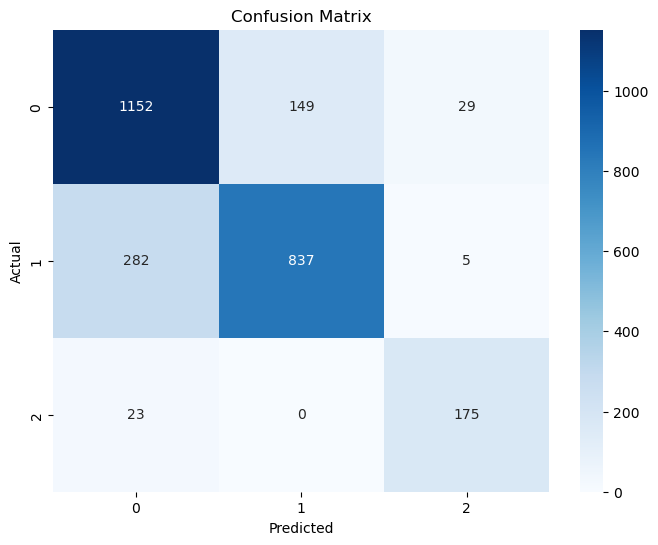

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter.filedialog import askopenfilename

# Select CSV file using file dialog
tk.Tk().withdraw()  # Hide the root window
file_path = askopenfilename(title="Select food_items.csv file", filetypes=[("CSV Files", "*.csv")])
data = pd.read_csv(file_path)

# Print column names
print("Column Names in the Dataset:")
print(data.columns)

# Separate features (X) and target (y)
X = data.drop(columns=['class'])  # Nutritional information as features
y = data['class']  # Target: class labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict the classifications on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model for multiclass classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
evaluation_report = classification_report(y_test, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print("\nClassification Report:\n", evaluation_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()